-1️ Import des bibliothèques

In [125]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt



 **Chargement du dataset et vérification des dimensions**

In [153]:
df = pd.read_csv("../data/raw/dataset-diabete.csv", index_col=0)

print("="*50)
print(f" Nom du dataset : dataset-diabete.csv")
print(f" Nombre de lignes et de colonnes : {df.shape}")
print("="*50, "\n")
print(" Aperçu des 5 premières lignes du dataset :\n")
print(df.head())
print("\n" + "="*50 + "\n")

print(" Colonnes du dataset :")
for i, col in enumerate(df.columns.tolist()):
    print(f"{i+1}. {col}")
print("="*50)


 Nom du dataset : dataset-diabete.csv
 Nombre de lignes et de colonnes : (768, 8)

 Aperçu des 5 premières lignes du dataset :

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


 Colonnes du dataset :
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age


**Types de données et valeurs manquantes**

In [154]:
print("="*50)
print(" Types de données par colonne :")
print(df.dtypes)
print("="*50, "\n")

print(" Nombre de valeurs manquantes par colonne :")
print(df.isna().sum())
print("="*50)

if df.isna().any().any():
    print("\n Il y a des valeurs manquantes dans ce dataset.")
else:
    print("\n Aucune valeur manquante dans ce dataset.\n")
print("="*50)

 Types de données par colonne :
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

 Nombre de valeurs manquantes par colonne :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

 Aucune valeur manquante dans ce dataset.



**Statistiques descriptives**

In [155]:
from sklearn.impute import KNNImputer

print("="*50)
print("Statistiques descriptives du dataset  :\n")
print(df.describe())
print("="*50)
col_avec_zeros=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

# df[col_avec_zeros]=df[col_avec_zeros].replace(0,np.nan)
for col in col_avec_zeros:
    df[col]=df[col].replace(0,np.nan)

print(df.notna().sum())

imputer = KNNImputer(n_neighbors=7)  
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

print(df_imputed.describe())
print(df_imputed.notna().sum())

df_imputed.to_csv("../data/raw/dataset_diabete_imputed.csv", index=False)


Statistiques descriptives du dataset  :

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.07800

## **Visualisations**

**Visualiser les distributions des variables numériques**

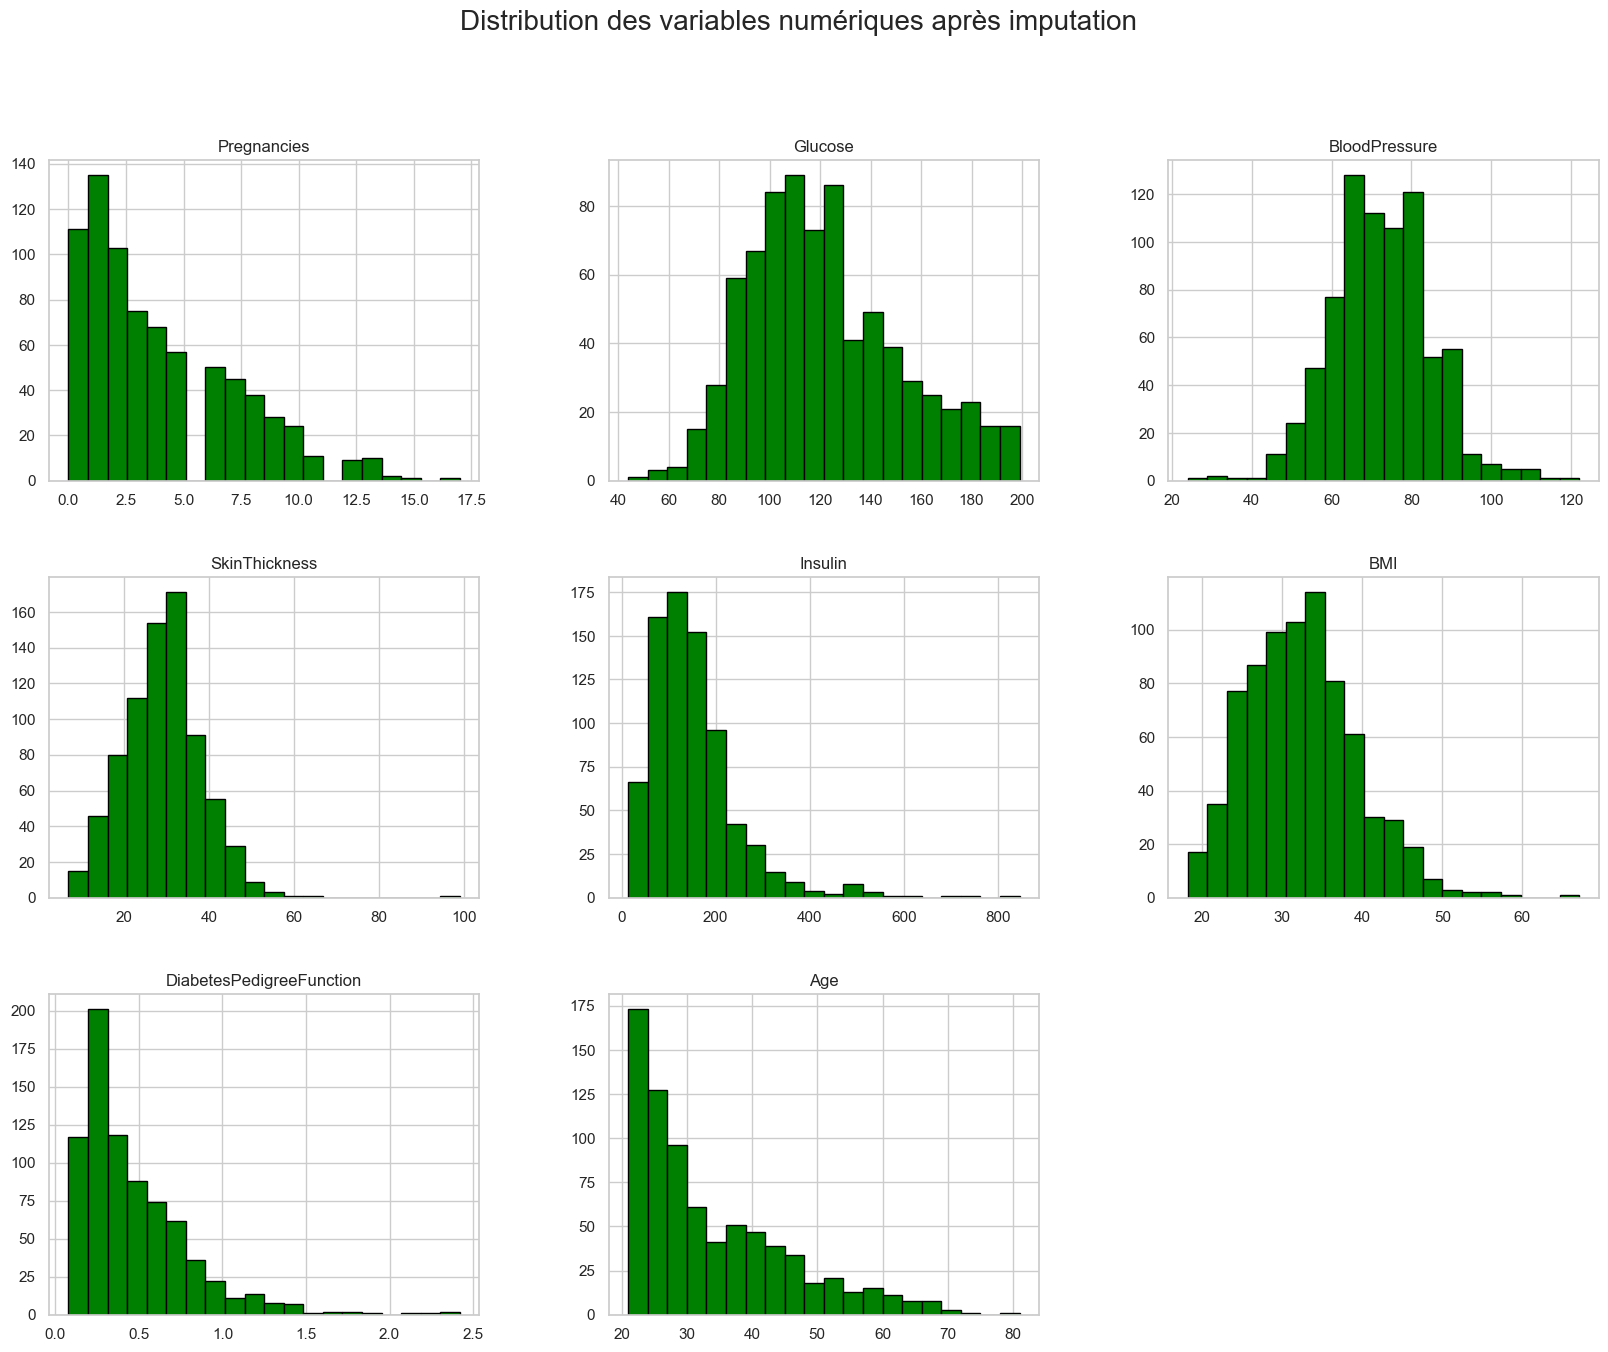

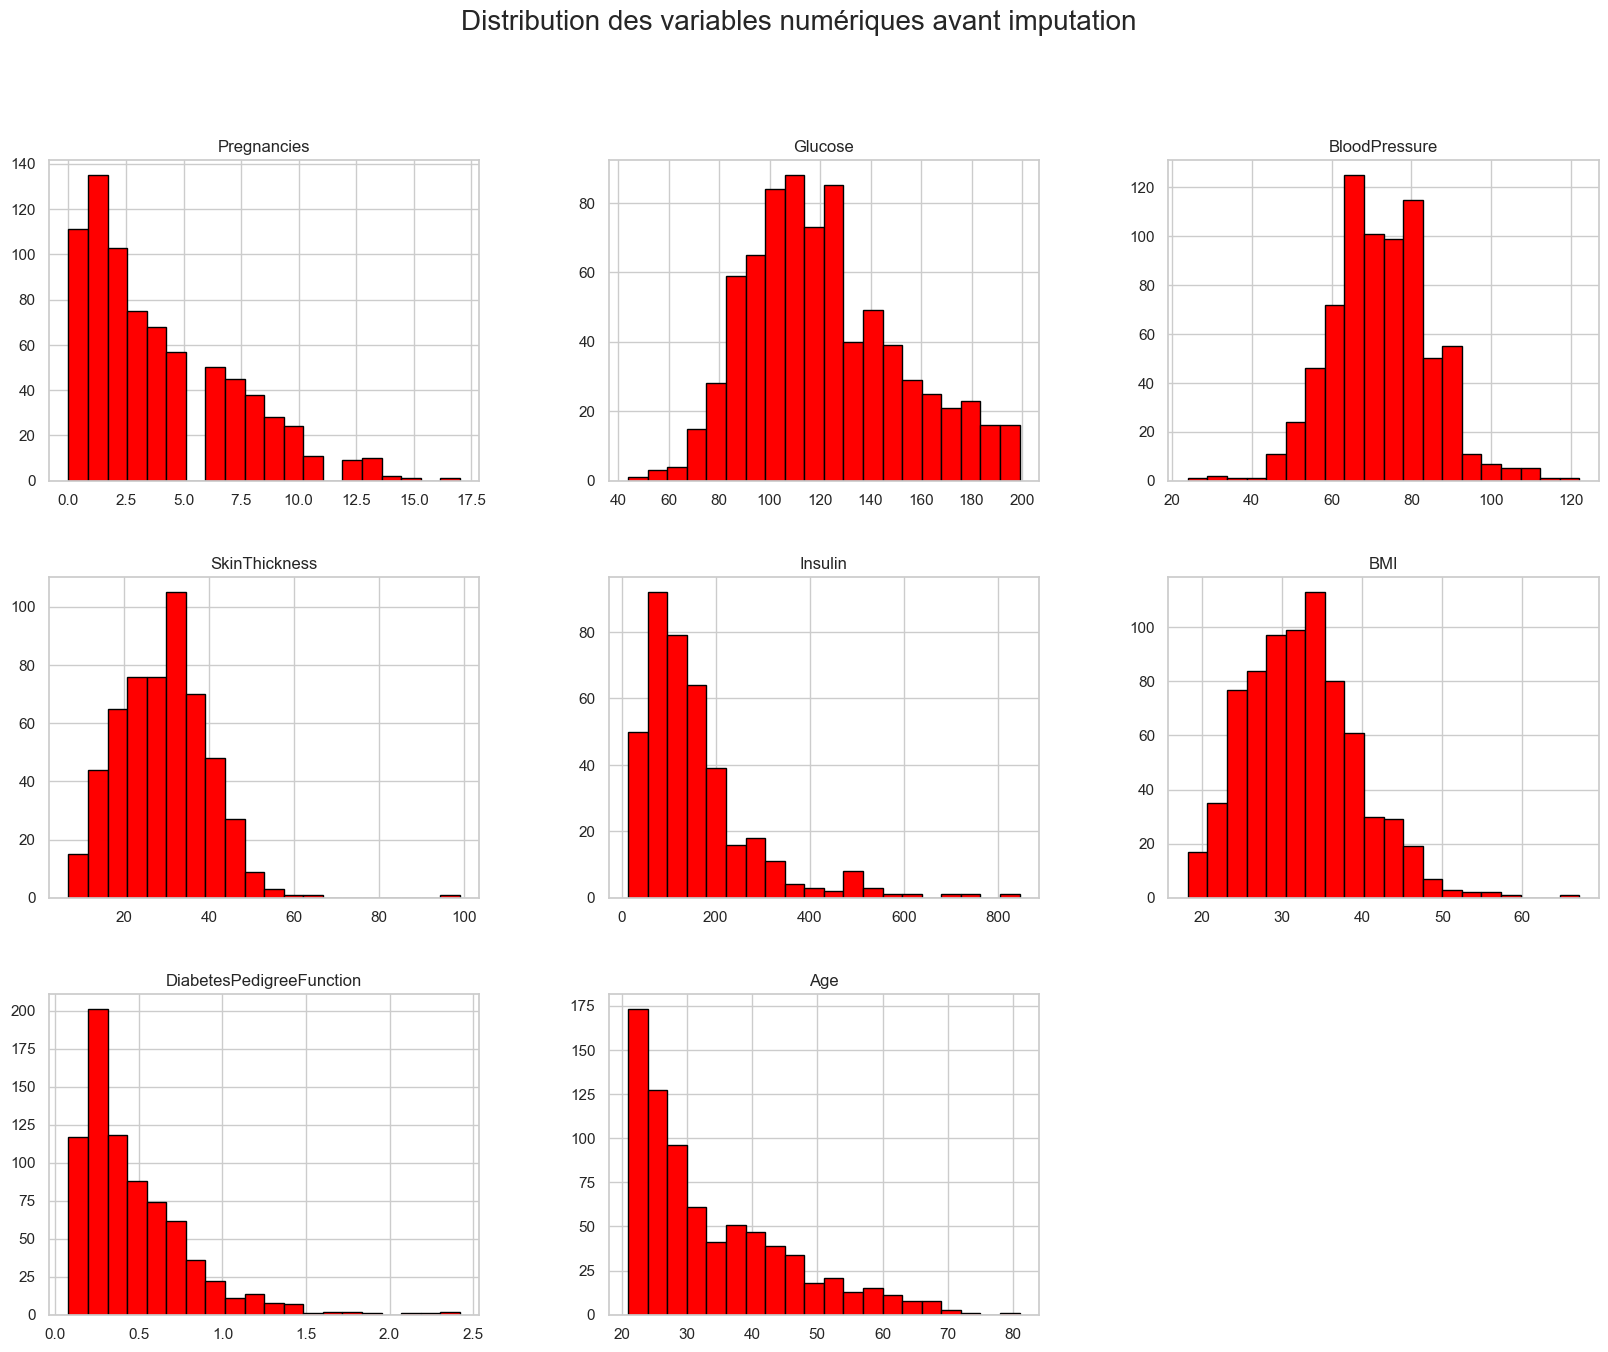

In [137]:

df_imputed=pd.read_csv("../data/raw/dataset_diabete_imputed.csv")
df_imputed.hist(bins=20, figsize=(20,15), color="green", edgecolor="black")
plt.suptitle("Distribution des variables numériques après imputation", fontsize=20)
plt.show()

df.hist(bins=20, figsize=(20,15), color="red", edgecolor="black")
plt.suptitle("Distribution des variables numériques avant imputation", fontsize=20)
plt.show()


**Boîtes à moustaches (Boxplots) pour détecter les valeurs extrêmes**

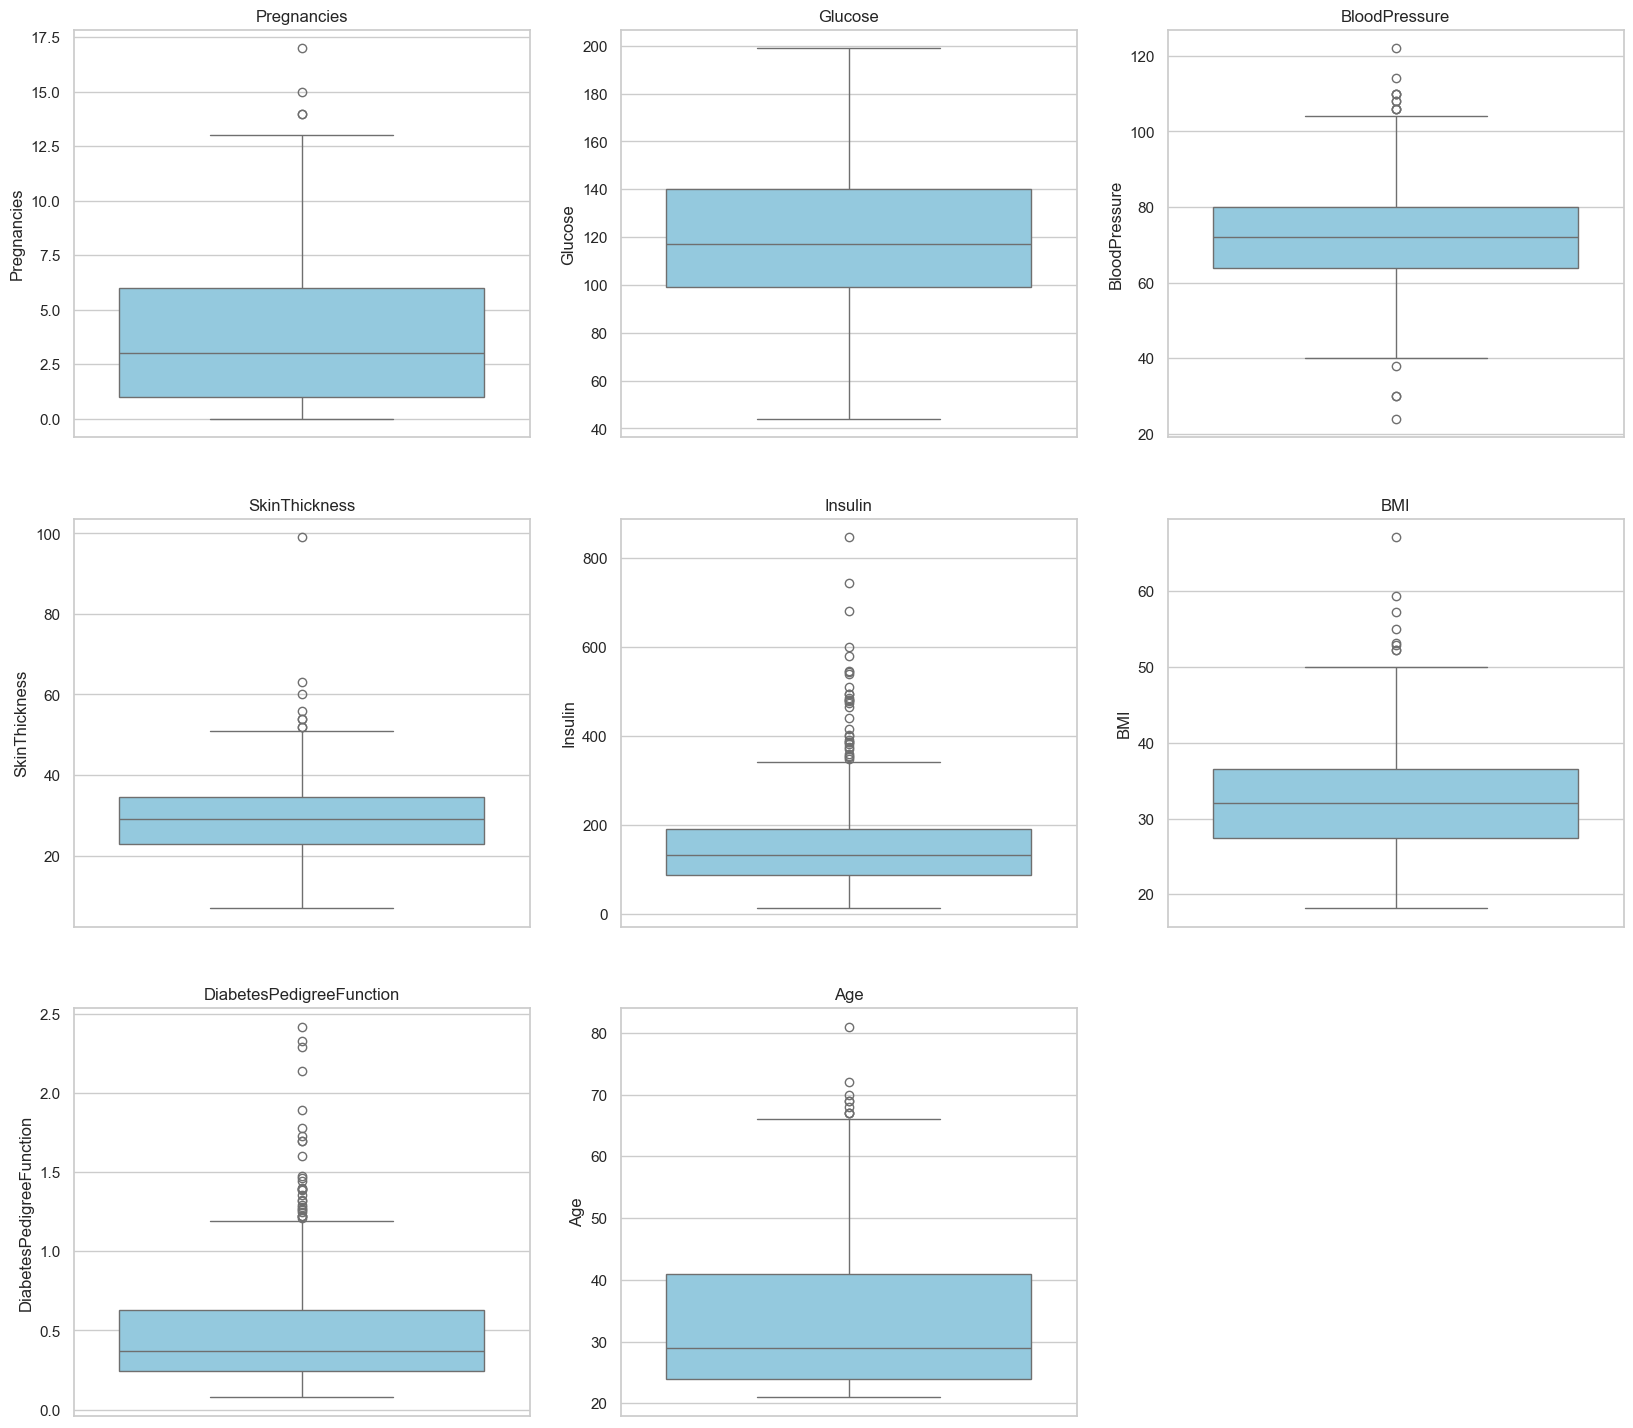

In [138]:

plt.figure(figsize=(20,18))
for i,c in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df_imputed[c], color='skyblue')
    plt.title(c)
plt.show()


**Carte de corrélation (Heatmap) pour voir les relations entre variables**

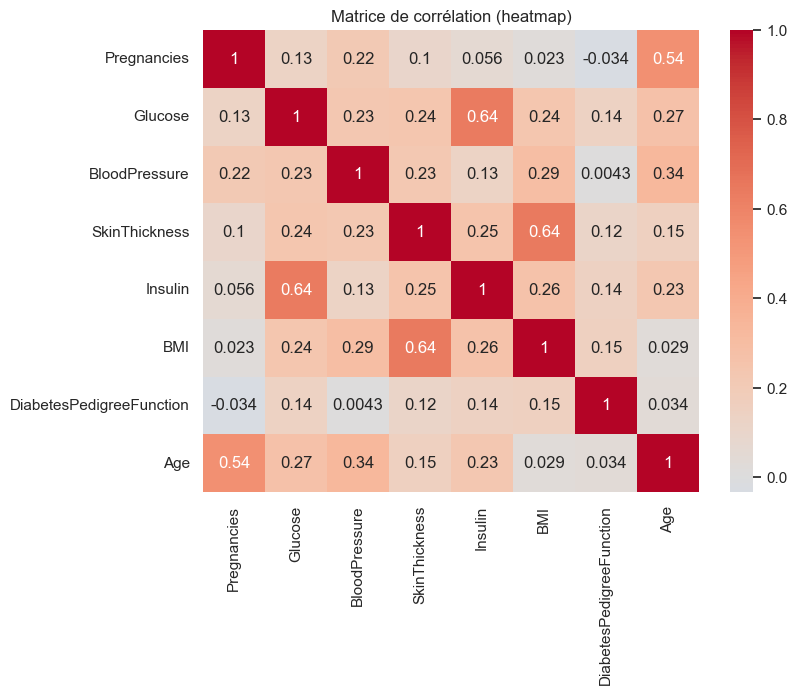

In [139]:

corr = df_imputed.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)

plt.title("Matrice de corrélation (heatmap)")
plt.show()

**Nuage de points (Scatter plot) pour deux variables importantes**

C:\Users\oussa\AppData\Local\Temp\ipykernel_57456\1040688204.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_imputed, x=x_var, y=y_var, palette="coolwarm", alpha=0.6)


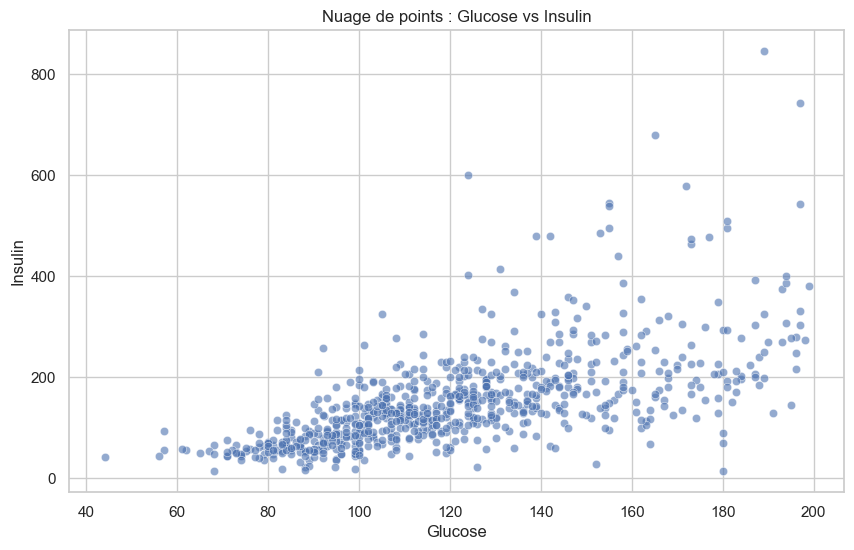

In [152]:


x_var = "Glucose"
y_var = "Insulin"

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_imputed, x=x_var, y=y_var, palette="coolwarm", alpha=0.6)
plt.title(f"Nuage de points : {x_var} vs {y_var}")
plt.show()



#  Mini Rapport EDA — Analyse exploratoire des données du diabète

##  1. Objectif de l’analyse
L’objectif de cette analyse est d’explorer le jeu de données du diabète afin de mieux comprendre la distribution des variables, détecter les valeurs manquantes ou aberrantes, et préparer les données pour l’entraînement d’un modèle prédictif.

---

##  2. Aperçu du dataset
Le dataset contient **768 observations** et **9 variables** :
- **Pregnancies** : nombre de grossesses  
- **Glucose** : taux de glucose dans le sang  
- **BloodPressure** : pression artérielle  
- **SkinThickness** : épaisseur de la peau (mm)  
- **Insulin** : taux d’insuline  
- **BMI** : indice de masse corporelle  
- **DiabetesPedigreeFunction** : facteur héréditaire du diabète  
- **Age** : âge du patient  
- **Outcome** : 1 si la personne est diabétique, 0 sinon  

---

##  3. Statistiques descriptives
Après imputation et nettoyage :
```python
print(df_imputed.describe())
```
 On observe :
- Moyenne du glucose : environ **120 mg/dL**
- Moyenne du BMI : **32**
- Âge moyen : **33 ans**
- Forte variabilité de l’insuline (écart-type élevé)

---

##  4. Données manquantes et imputation
Certaines variables (comme `Insulin`, `SkinThickness`, `BMI`) contenaient des **valeurs nulles ou nulles remplaçant des zéros**.  
Elles ont été corrigées à l’aide du **KNNImputer (k=7)** pour prédire les valeurs manquantes en se basant sur les observations les plus proches.

```python
imputer = KNNImputer(n_neighbors=7)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
```

 Toutes les valeurs manquantes ont été remplacées avec succès.

---

##  5. Visualisation des distributions
 5.1 Les histogrammes montrent la répartition des variables avant et après imputation :

```python
df.hist(bins=20, figsize=(20,15), color="red")
plt.suptitle("Distribution avant imputation")

df_imputed.hist(bins=20, figsize=(20,15), color="green")
plt.suptitle("Distribution après imputation")
```

Les distributions générales restent cohérentes, mais les valeurs extrêmes sont légèrement lissées.

---

5.2 Carte de corrélation (Heatmap)

Une heatmap permet de visualiser les relations entre les variables numériques — les valeurs proches de 1 ou -1 indiquent une corrélation forte (positive ou négative).
```python

plt.figure(figsize=(10,8))
sns.heatmap(df_imputed.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Carte de corrélation entre les variables")
plt.show()

```

Interprétation :

On peut repérer quelles variables sont les plus liées entre elles (ex. : Glucose et BMI).

Cela aide à éviter la multicolinéarité avant l'entraînement d’un modèle.

---

5.3 Boîtes à moustaches (Boxplots) pour détecter les valeurs extrêmes

Les boxplots permettent de visualiser la dispersion et de repérer les outliers (valeurs extrêmes).

```python

plt.figure(figsize=(20,15))
for i, col in enumerate(df_imputed.columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df_imputed, x=col, color="skyblue")
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()
```

Interprétation :

Les valeurs extrêmes apparaissent sous forme de points isolés.

Certaines colonnes comme Insulin ou SkinThickness présentent des valeurs très dispersées.

---

##  6. Relations entre variables
**Exemple : Glucose vs Insulin**
```python
sns.scatterplot(data=df_imputed, x="Glucose", y="Insulin", alpha=0.6, color="green")
plt.title("Nuage de points : Glucose vs Insulin (après imputation)")
```

 On observe une **tendance positive faible** : les individus avec un BMI élevé ont souvent un glucose plus haut.

---

##  7. Conclusions
- Le dataset est globalement propre et équilibré.  
- Les valeurs manquantes ont été traitées efficacement avec **KNNImputer**.  
- Les distributions sont normales pour la plupart des variables.  
- Certaines relations (Glucose–BMI, Âge–DiabetesPedigreeFunction) peuvent influencer le diagnostic du diabète.  

 **Prochaine étape :** normalisation / standardisation des données, puis entraînement des modèles de classification (ex. RandomForest, XGBoost, SVR).
